<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Web Scraping</h1>


Not all stock data is available via the API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.  
 You will extract and share historical data from a web page using the BeautifulSoup library.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. Extracting data using BeautifulSoup
   
    <ul> 
    <li> Download the web page Using Requests Library </li>
    <li> Parse HTML on a web page using BeautifulSoup </li>
    <li> Extract data and duild a data frame </li>

    </ul>

2. Extracting data using pandas
3. Exercise
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [6]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
#!pip install plotly==5.3.1

'mamba' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'mamba' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


     ---------------------------------------- 3.5/3.5 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.2
    Uninstalling lxml-4.9.2:
      Successfully uninstalled lxml-4.9.2


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Farouq MOUSMI\\anaconda3\\Lib\\site-packages\\~-ml\\etree.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [16]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Using Webscraping to Extract Stock Data Example


We will extract Netflix stock data [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html).


<center> 
    
#### In this example, we are using yahoo finance website and looking to extract Netflix data.

</center>
    <br>

  <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/netflix.png"> </center> 
  
<center> Fig:- Table that we need to extract </center>


On the following web page we have a table with columns name (Date, Open, High, Low, close, adj close volume) out of which we must extract following columns  

* Date 

* Open  

* High 

* Low 

* Close 

* Volume 



# Steps for extracting the data
1. Send an HTTP request to the web page using the requests library.
2. Parse the HTML content of the web page using BeautifulSoup.
3. Identify the HTML tags that contain the data you want to extract.
4. Use BeautifulSoup methods to extract the data from the HTML tags.
5. Print the extracted data


### Step 1: Send an HTTP request to the web page


You will use the request library for sending an HTTP request to the web page.<br>


In [37]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.


In [38]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

### Step 2: Parse the HTML content


<hr>
<hr>
<center>

# What is parsing?
In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning.
Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.</center>
<hr>
<hr>


Next you will take the raw HTML content of a web page or a string of HTML code which needs to be parsed and transformed into a structured, hierarchical format that can be more easily analyzed and manipulated in Python. This can be done using a Python library called <b>Beautiful Soup</b>.


## Parsing the data using the BeautifulSoup library
* Create a new BeautifulSoup object.
<br>
<br>
<b>Note: </b>To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:

1. The HTML or XML content that you want to parse as a string.
2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library.
here in this lab we are using "html5lib" parser.


In [14]:
!pip install html5lib

     -------------------------------------- 112.2/112.2 kB 1.6 MB/s eta 0:00:00


### Step 3: Identify the HTML tags


As stated above, the web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.


You will create an empty data frame using the <b> pd.DataFrame() </b> function with the following columns:
* "Date"
* "Open"
* "High" 
* "Low" 
* "Close"
* "Volume"


<hr>
<hr>
<center>

### Working on HTML table  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt;: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt;: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt;: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt;: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt;: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>



### Step 4: Use a BeautifulSoup method for extracting data



We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.


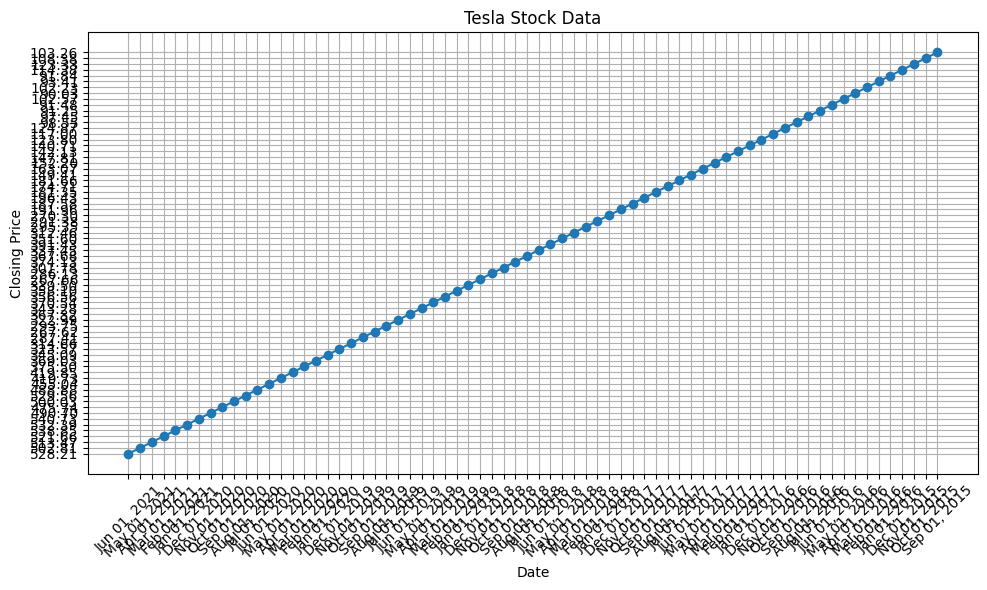

In [42]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

soup = BeautifulSoup(data, 'html5lib')
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])
data_to_append = []

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    data_to_append.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume})

netflix_data = pd.concat([netflix_data, pd.DataFrame(data_to_append)], ignore_index=True)

def make_graph(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], marker='o', linestyle='-')
    plt.title('Tesla Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Assuming you have already loaded the data and stored it in the variable `tesla_stock_data`
make_graph(netflix_data)
plt.show()

### Step 5: Print the extracted data


We can now print out the data frame using the head() or tail() function.


In [33]:
netflix_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,"61,902,300"


In [34]:
netflix_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,91.84,"488,193,200"
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,114.38,"319,939,200"
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,123.33,"320,321,800"
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,108.38,"446,204,400"
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,103.26,"497,401,200"


# Extracting data using `pandas` library


We can also use the pandas `read_html` function from the pandas library and use the URL for extracting data.


<center>

## What is read_html in pandas library?
`pd.read_html(url)` is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. It takes in a URL as input and returns a list of all the tables found on the web page. 
</center>


In [28]:
read_html_pandas_data = pd.read_html(url)
read_html_pandas_data

[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

Or you can convert the BeautifulSoup object to a string.


In [30]:
read_html_pandas_data = pd.read_html(str(soup))
read_html_pandas_data

[                                                 Date  \
 0                                        Jun 01, 2021   
 1                                        May 01, 2021   
 2                                        Apr 01, 2021   
 3                                        Mar 01, 2021   
 4                                        Feb 01, 2021   
 ..                                                ...   
 66                                       Dec 01, 2015   
 67                                       Nov 01, 2015   
 68                                       Oct 01, 2015   
 69                                       Sep 01, 2015   
 70  *Close price adjusted for splits.**Adjusted cl...   
 
                                                  Open  \
 0                                              504.01   
 1                                              512.65   
 2                                              529.93   
 3                                              545.57   
 4          

Because there is only one table on the page, just take the first table in the returned list.


In [31]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# Exercise: use webscraping to extract stock data


Use the `requests` library to download the webpage [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html). Save the text of the response as a variable named `html_data`.


Parse the html data using `beautiful_soup`.


<b>Question 1:</b> What is the content of the title attribute?


Using BeautifulSoup, extract the table with historical share prices and store it into a data frame named `amazon_data`. The data frame should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list `col`. 


In [ ]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = #ADD_CODE
    Open = #ADD_CODE
    high = #ADD_CODE
    low = #ADD_CODE
    close = #ADD_CODE
    adj_close = #ADD_CODE
    volume = #ADD_CODE
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

Print out the first five rows of the `amazon_data` data frame you created.


<b>Question 2:</b> What are the names of the columns in the data frame?


<b>Question 3:</b> What is the `Open` of the last row of the amazon_data data frame?


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani<br>
Akansha yadav


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    |       Change Description              |
| ----------------- | ------- | ------------- | ------------------------------------- |
|  02-05-2023       |   1.3   | Akansha yadav | Updated Lab content under maintenance |
|  2021-06-09       | 1.2     | Lakshmi Holla |   Added URL in question 3             |
|  2020-11-10       | 1.1     | Malika Singla |   Deleted the Optional part           |
|  2020-08-27       | 1.0     | Malika Singla |   Added lab to GitLab                 |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
